In [1]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns

import os
import acquire as a
import prepare as p

# 1
Convert date column to datetime format.


#load my csv
df = pd.read_csv('ts_superstore.csv', index_col=0)
df.head()

#format sale date
df.sale_date = df.sale_date.str.replace('00:00:00 GMT','')

#remove wihite space
df.sale_date = df.sale_date.str.strip()

#change to date and time
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')

#check it out
df.sale_date

# 2
Plot the distribution of sale_amount and item_price.


#distribution of sale_amount
df.sale_amount.hist();

#distribution of item_price
df.item_price.hist();

# 3
Set the index to be the datetime variable.


#set index as sale_date
df = df.set_index('sale_date')

#sort index values
df = df.sort_index()

#check it out
df.head()

# 4
Add a 'month' and 'day of week' column to your dataframe.


#add day of week column
df['day_of_week'] = df.index.day_name()
df.head()

df['month'] = df.index.month_name()
df.head()

# 5
Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


df['sales_total']= (df.sale_amount * df.item_price)
df.head()

# 6
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [3]:
df = p.get_superstore()
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,day_of_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Tuesday,January,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Tuesday,January,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,Tuesday,January,308.48
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Tuesday,January,197.55
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Tuesday,January,25.16


# Germany

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:



# 1
Convert date column to datetime format.


#get the data
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = a.get_power(url)
df

#check dtypes
df.dtypes

#rename columns
df = df.rename(columns={'Date':'date','Consumption':'consumption','Wind':'wind','Solar':'solar','Wind+Solar':'wind_solar'})
df

#set datetime
df.date = pd.to_datetime(df.date)
df

#verify datetime in proper format
df.dtypes

# 2
Plot the distribution of each of your variables.


df.head()

#distribution of consumption
df.consumption.hist()
plt.show()

#distribution of wind
df.wind.hist()
plt.show()

#distribution of solar
df.solar.hist()
plt.show()

#distribution of wind_solar
df.wind_solar.hist()
plt.show()

# 3
Set the index to be the datetime variable.


df = df.set_index('date')
df.head()

df = df.sort_index()
df.head()

# 4
Add a month and a year column to your dataframe.


df['month'] = df.index.month_name() 
df.head()

df['year'] = df.index.strftime('%Y')
df.head()


# 5
Fill any missing values.

df.isnull().sum()

df.shape

df.wind.plot()

df.solar.plot()

plt.figure(figsize=(10,6))

df.resample('M').mean().consumption.plot(label='Monthly Consumption')
df.resample('M').mean().wind.plot(label='Monthly Wind production')
df.resample('M').mean().wind_solar.plot(label='Monthly Solar production')
df.resample('M').mean().wind_solar.plot(label='mothly Wind and Solar production')
df.resample('M').mean().other_energy_sources.plot(label='Other energy sources')

plt.title('consumption')
plt.legend()
plt.show()

df = df.dropna()
df.head()

df.isnull().sum()

df['other_energy_sources'] = df.consumption - df.wind_solar
df

# 6
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [7]:
#check that function works
df = p.get_germany()
df.head()

,consumption,wind,solar,wind_solar,month,year,other_energy_sources
date,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,January,2012,714.076
2012-01-02,1269.581,207.327,6.574,213.901,January,2012,1055.680
2012-01-03,1334.745,473.468,24.679,498.147,January,2012,836.598
2012-01-04,1347.136,499.804,14.681,514.485,January,2012,832.651
2012-01-05,1376.658,523.851,5.071,528.922,January,2012,847.736


In [8]:
df.dtypes

consumption             float64
wind                    float64
solar                   float64
wind_solar              float64
month                    object
year                      int64
other_energy_sources    float64
dtype: object

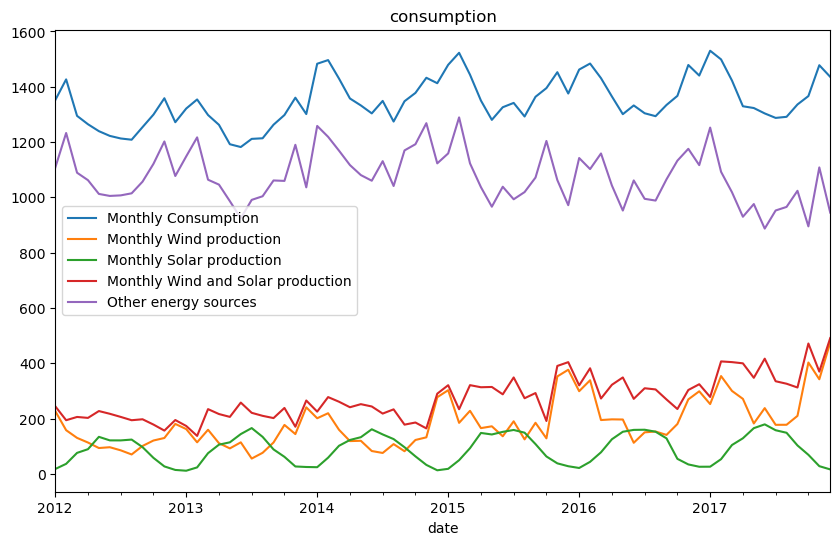

In [9]:
plt.figure(figsize=(10,6))

df.resample('M').mean().consumption.plot(label='Monthly Consumption')
df.resample('M').mean().wind.plot(label='Monthly Wind production')
df.resample('M').mean().solar.plot(label='Monthly Solar production')
df.resample('M').mean().wind_solar.plot(label='Monthly Wind and Solar production')
df.resample('M').mean().other_energy_sources.plot(label='Other energy sources')

plt.title('consumption')
plt.legend()
plt.show()